### Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Membaca File csv

In [4]:
df = pd.read_csv("life expectancy.csv")

In [5]:
df.nunique()

Country Name                       174
Country Code                       174
Region                               7
IncomeGroup                          4
Year                                19
Life Expectancy World Bank        2966
Prevelance of Undernourishment     399
CO2                               2259
Health Expenditure %              3126
Education Expenditure %           2192
Unemployment                      2151
Corruption                           8
Sanitation                        1941
Injuries                          3306
Communicable                      3306
NonCommunicable                   3306
dtype: int64

### A1. Supervised Learning

### Support Vector Machine

### Menaruh library baru sklearn untuk minmaxacaler dan ordinal encoder

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
nrm = MinMaxScaler()
ord = OrdinalEncoder()

### Copy df

In [7]:
df2 = df

### Mengahpus Data Null

In [8]:
df2.dropna(inplace=True)

### Mengahapus columns yang kurang berguna

In [9]:
df2.drop(columns=["Country Name", "Country Code", "Year"], inplace=True)
df2

,Region,IncomeGroup,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
698,Europe & Central Asia,Upper middle income,75.228,8.9,4030.000210,6.335542,3.281550,15.970000,3.0,41.875655,94241.87,99241.18,568930.66
702,Europe & Central Asia,Upper middle income,72.626,12.3,4460.000038,5.861883,2.712030,10.203000,2.5,46.657125,92659.79,105444.38,793047.77
707,Europe & Central Asia,Upper middle income,68.747,4.8,30040.000916,2.261077,2.974620,7.260000,2.5,23.121008,240229.35,826520.96,2003781.90
724,Sub-Saharan Africa,Low income,44.744,39.6,219.999999,4.367321,1.652220,5.695000,2.5,19.090005,310132.64,3766393.86,805165.65
737,Middle East & North Africa,Lower middle income,57.991,31.3,430.000007,3.224672,8.365890,27.719999,2.5,25.705269,28409.67,310769.59,115615.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3279,Sub-Saharan Africa,Lower middle income,70.385,13.0,150.000006,5.529762,5.921550,14.144000,3.5,33.535911,4293.10,16170.29,33337.54
3285,Sub-Saharan Africa,Low income,54.239,31.7,2250.000000,4.353631,2.372460,1.123000,2.5,9.951136,626720.09,8496915.83,2459705.38
3286,Sub-Saharan Africa,Low income,61.042,20.1,2369.999886,5.726069,4.069143,3.719000,3.0,9.103834,246081.26,1992666.23,1190315.76
3294,Sub-Saharan Africa,Lower middle income,65.456,23.4,12449.999809,3.827693,3.596836,2.222000,3.0,26.238278,1478236.12,13341065.72,8469064.37


In [10]:
X = df2.drop(columns="IncomeGroup")
y = df2.IncomeGroup

### merubah object menjadi number pada setiap kategorinya

In [11]:
X.Region = ord.fit_transform(X[["Region"]])

### Melakukan normalisasi dengan minmaxscaler 

In [12]:
columns = list(X.columns)
X[columns] = nrm.fit_transform(X[columns])

### mengapus columns yang tidak kepake agar mempermudah dalam membacanya

In [13]:
X.drop(columns=["CO2", "Corruption", "Injuries", "Communicable", "NonCommunicable"], inplace=True)

### Memasukkan data X dan y menjadi dataframe dalam perintah concat

In [14]:
df3 = pd.concat([X, y], axis=1)

### Mencari data yang cocok untuk digunakan

d:\APK\python 3.10.7\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\APK\python 3.10.7\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\APK\python 3.10.7\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\APK\python 3.10.7\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

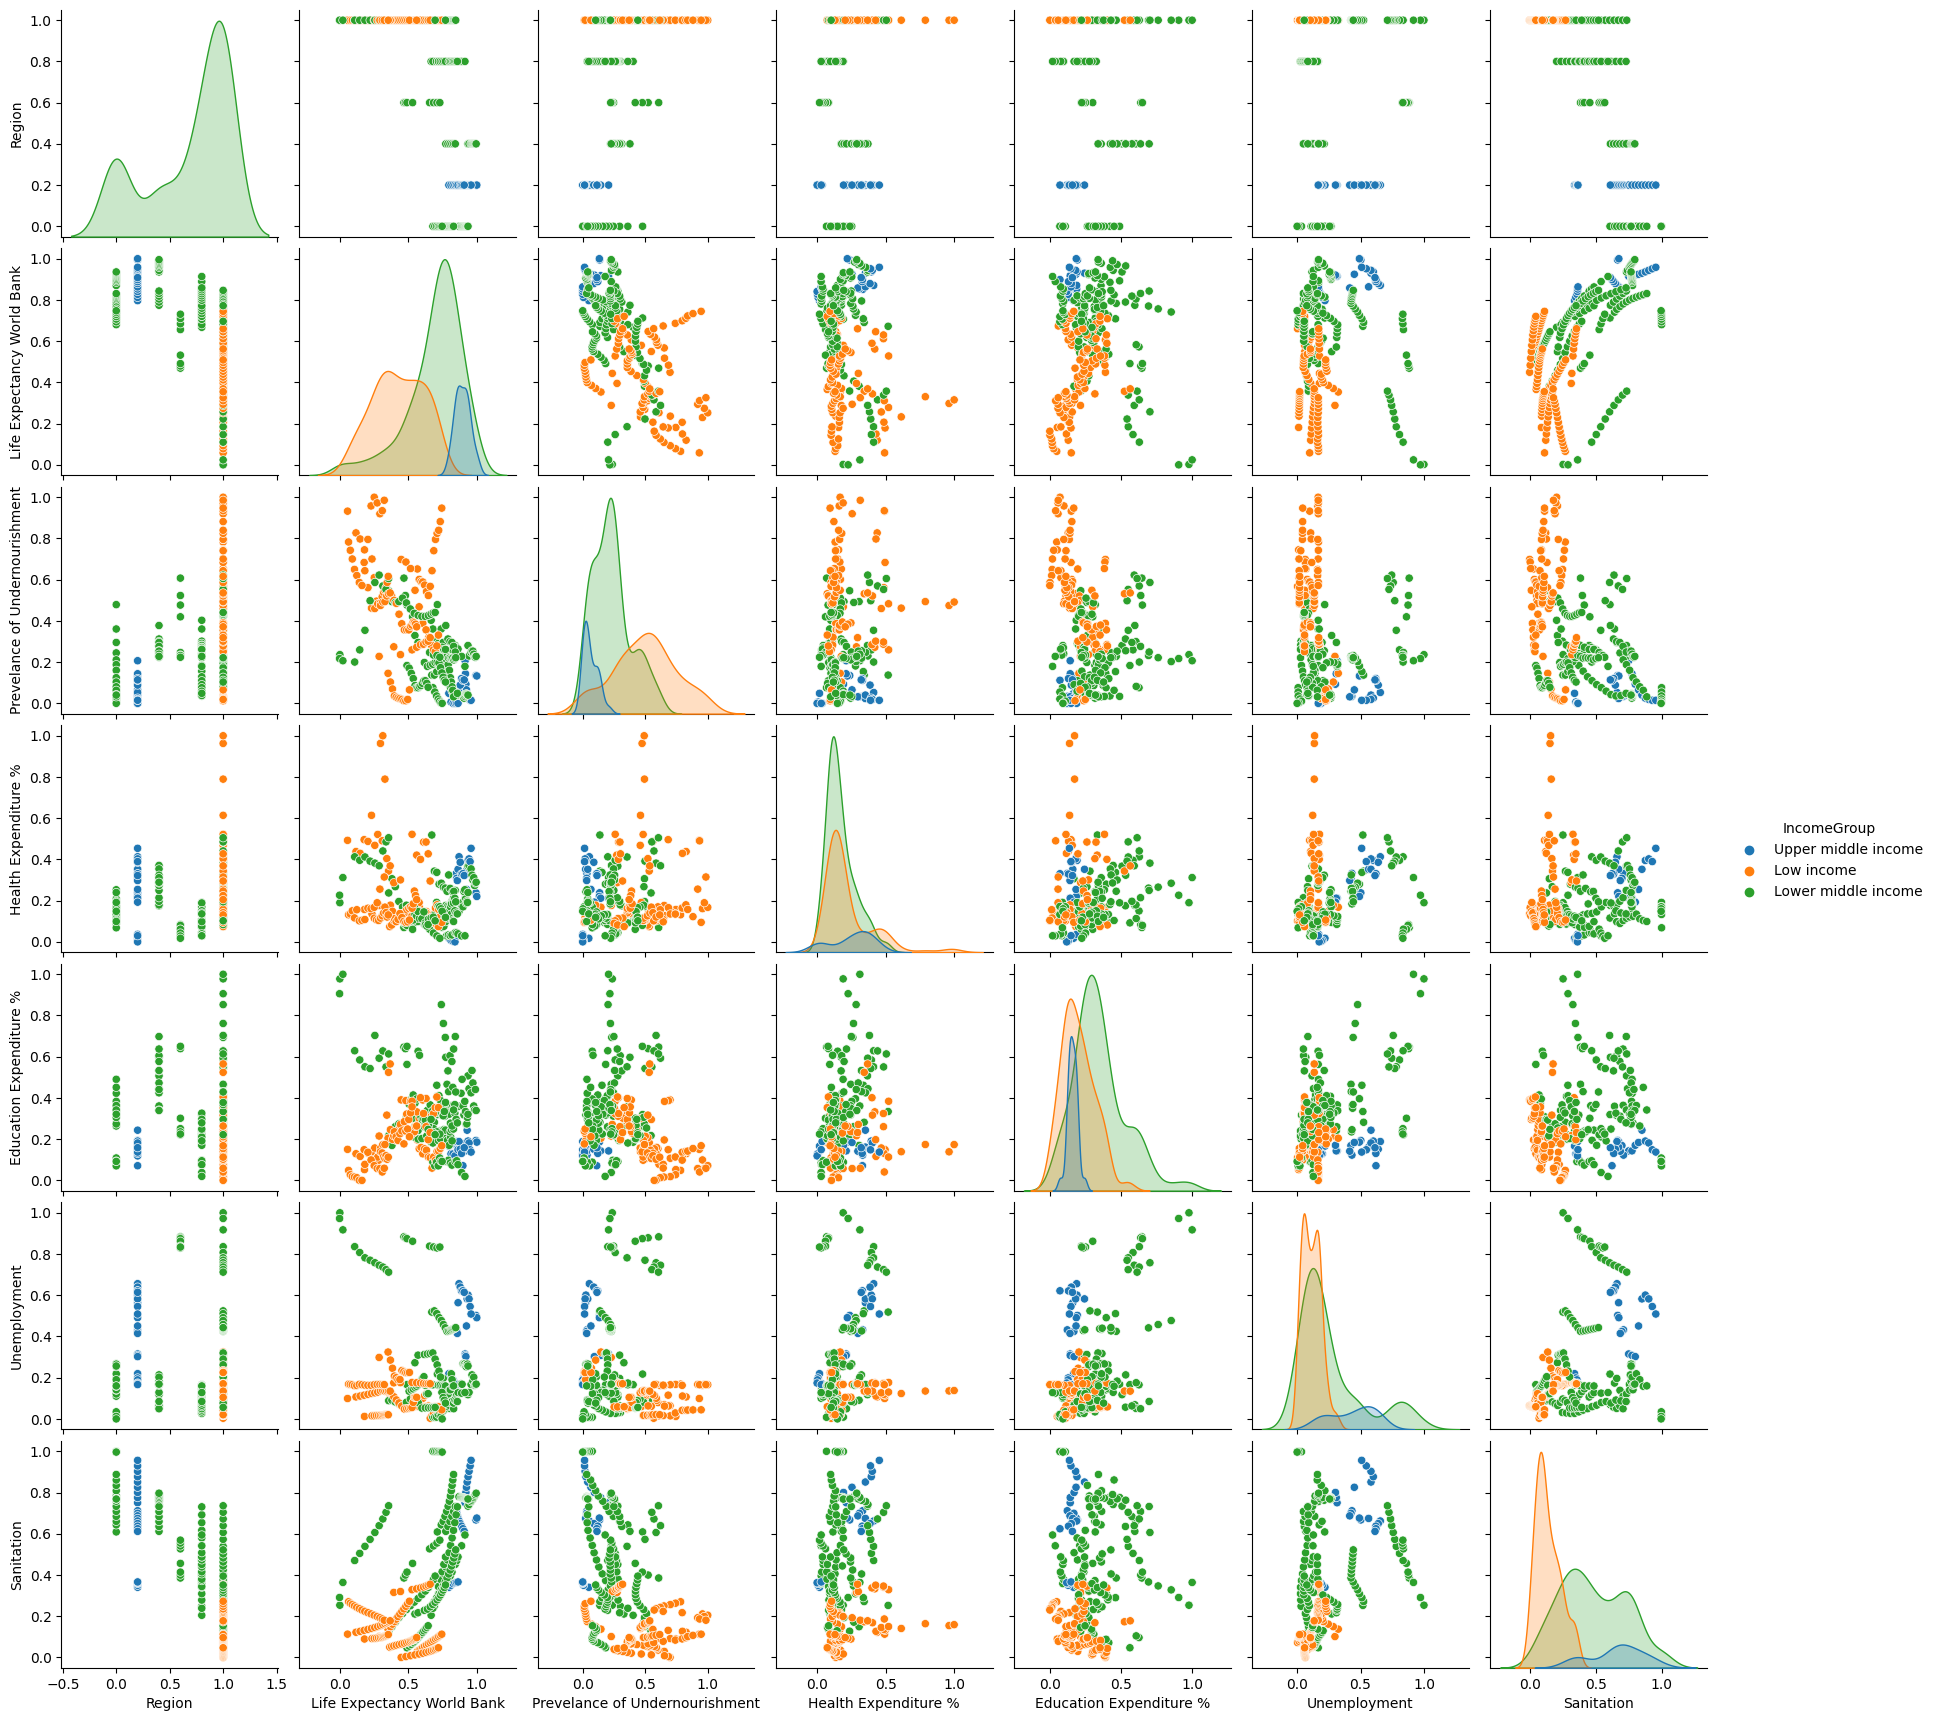

In [15]:
sns.pairplot(df3, hue="IncomeGroup", palette="tab10")
plt.show()

### Penentuan perubahan dalam memilih feature dan target

In [16]:
# Education Expenditure (%) vs Life Expectancy World Bank
X1 = df3[["Education Expenditure %", "Life Expectancy World Bank"]]
y1 = df3["IncomeGroup"]

### Melakukan Split Data menggunakan train test split

In [17]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X1, y1, test_size=0.2, random_state=20)

### Melakukan SVM dengan SVC

In [18]:
from sklearn.svm import SVC
svm = SVC(kernel="poly")
svm.fit(X_train, y_train)

SVC(kernel='poly')

### Menentukan predict pada X_test

In [19]:
y_pred = svm.predict(X_test)

### Visualisasi SVM dengan poly

d:\APK\python 3.10.7\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\APK\python 3.10.7\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\APK\python 3.10.7\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\APK\python 3.10.7\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

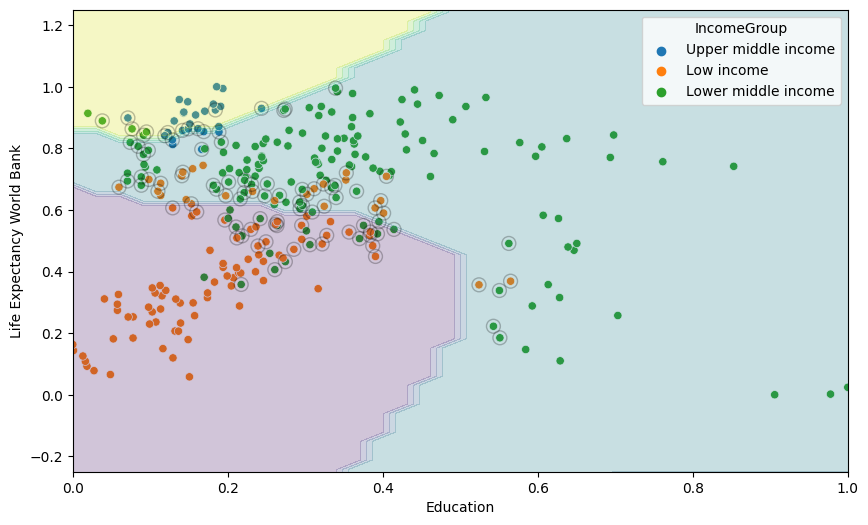

In [20]:
from sklearn.inspection import DecisionBoundaryDisplay as dbd

plt.figure(figsize=(10,6))
sns.scatterplot(x='Education Expenditure %', y='Life Expectancy World Bank', hue='IncomeGroup', data=df3)
plt.axis([0, 1, -0.25, 1.25])

ax = plt.gca()

dbd.from_estimator(
    estimator=svm,
    X=X1,
    plot_method="contourf",
    alpha=0.25,
    linestyles=["--", "-", "--"],
    ax=ax,
)

ax.scatter(
    svm.support_vectors_[:, 0],
    svm.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    alpha=0.25,
    facecolors="none",
    edgecolors="k",
)

plt.xlabel('Education')
plt.ylabel('Life Expectancy World Bank')
plt.show()

### Visualisasi confusion matrix

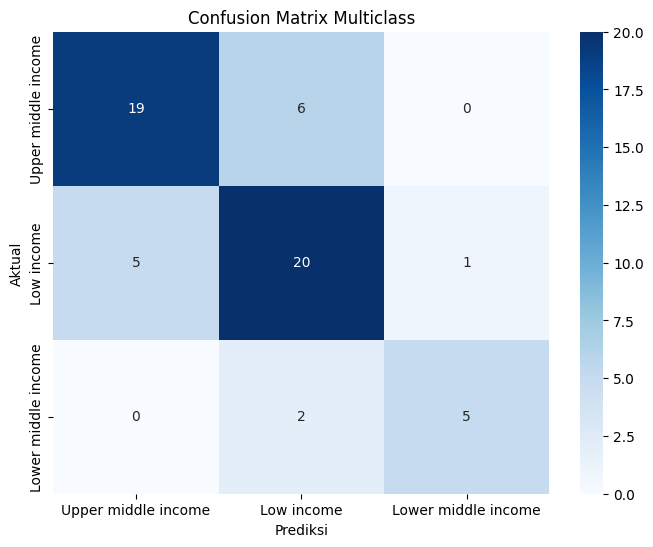

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
categories = ["Upper middle income", "Low income", "Lower middle income"]

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Multiclass')
plt.show()

### evaluasi data

In [22]:
from sklearn.metrics import classification_report
print(cm)
print(classification_report(y_test, y_pred))

[[19  6  0]
 [ 5 20  1]
 [ 0  2  5]]
                     precision    recall  f1-score   support

         Low income       0.79      0.76      0.78        25
Lower middle income       0.71      0.77      0.74        26
Upper middle income       0.83      0.71      0.77         7

           accuracy                           0.76        58
          macro avg       0.78      0.75      0.76        58
       weighted avg       0.76      0.76      0.76        58



### B. Clustering

#### Mencari Nilai K

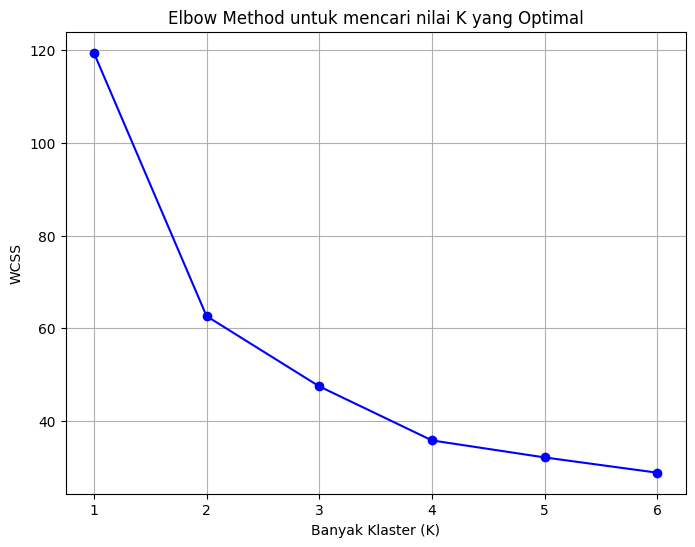

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

wcss = [] # Inisialisasi list untuk menyimpan nilai WCSS tiap kelompok
# Buat loop untuk melatih algoritma K-Means
for k in range(1, 7):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)
# Buat grafik Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init='auto')

In [25]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init='auto')

In [26]:
df['cluster'] = kmeans.labels_
centroid = kmeans.cluster_centers_

In [27]:
centroid

array([[0.9248    , 0.62166638, 0.22455696, 0.1709317 , 0.33818565,
        0.29570062, 0.34028295],
       [0.15774648, 0.8634878 , 0.11959945, 0.21349893, 0.28297524,
        0.25124869, 0.73965987],
       [1.        , 0.40458078, 0.58499766, 0.21940919, 0.18099713,
        0.09048722, 0.12427038]])

d:\APK\python 3.10.7\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\APK\python 3.10.7\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\APK\python 3.10.7\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


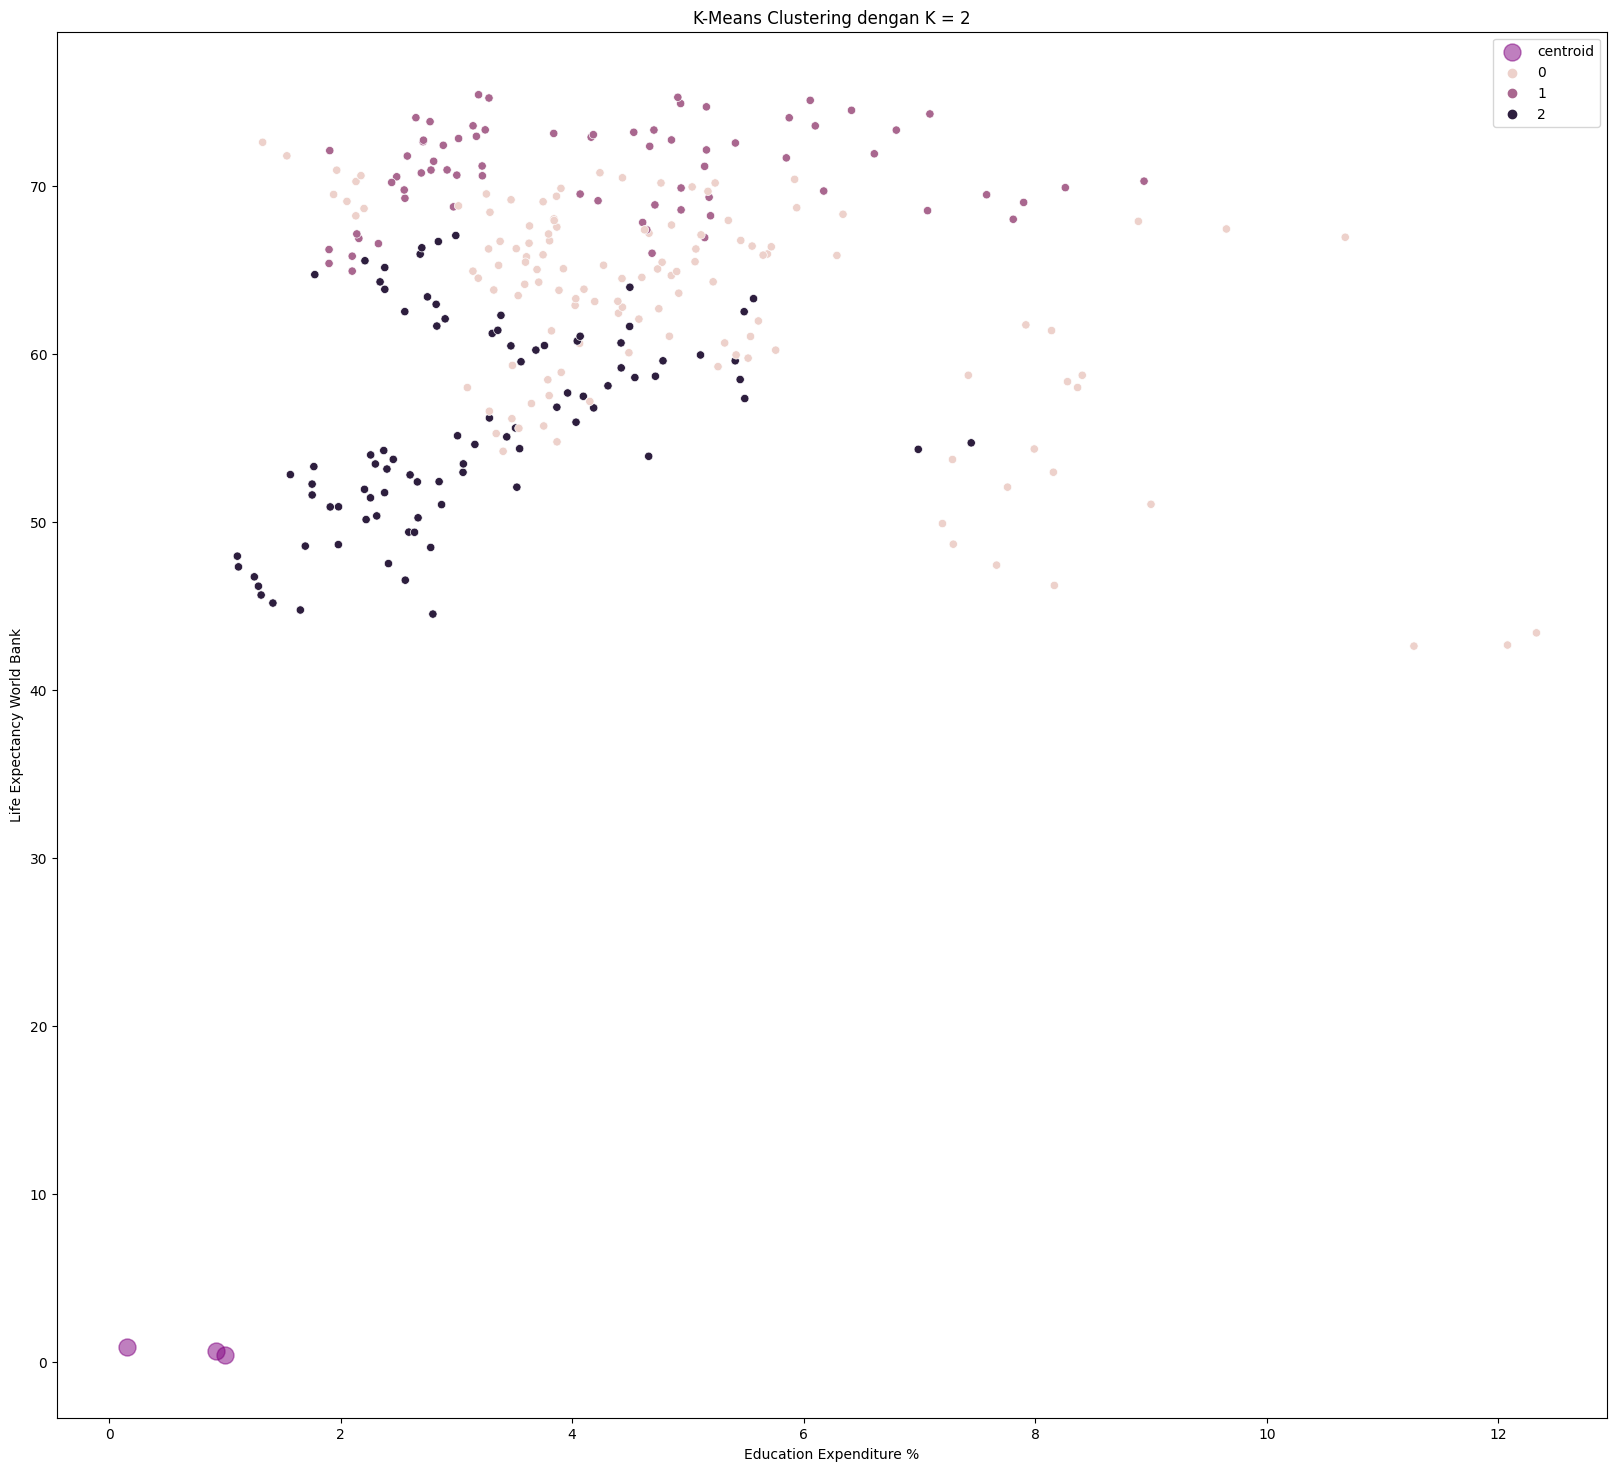

In [28]:
plt.figure(figsize = (20, 18 ))

# Data Points Pusat (Centroid)
plt.scatter(centroid[:, 0], centroid[:, 1], 
            alpha = 0.5, c = 'purple', s = 150, label = 'centroid')

# Data Points Hasil Prediksi Cluster
sns.scatterplot(data = df, x = 'Education Expenditure %', y = 'Life Expectancy World Bank',
                hue = 'cluster')
plt.title("K-Means Clustering dengan K = 2")
plt.xlabel = ("Cost of the Product")
plt.ylabel = ("Discount offered")
plt.legend(loc = 'upper right')

plt.show()

### - Tanpa label asli 

In [29]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

ss_score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {ss_score:.2f}")

db_index = davies_bouldin_score(X, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index:.2f}")

ch_index = calinski_harabasz_score(X, kmeans.labels_)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.34
Davies-Bouldin Index: 1.18
Calinski-Harabasz Index: 214.52


### - Dengan label asli

In [30]:
from sklearn.metrics import adjusted_rand_score # ARI
from sklearn.metrics import normalized_mutual_info_score # NMI
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score # HCV-M

cross_tab = pd.crosstab(df["cluster"], df["IncomeGroup"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

ari = adjusted_rand_score(df["IncomeGroup"], kmeans.labels_)
print(f"Adjusted Rand Index (ARI)           : {ari:.2f}")

true_labels_num = df["IncomeGroup"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, kmeans.labels_)
print(f"Normalized Mutual Information (NMI) : {nmi:.2f}")

homogeneity = homogeneity_score(df["IncomeGroup"], kmeans.labels_)
completeness = completeness_score(df["IncomeGroup"], kmeans.labels_)
v_measure = v_measure_score(df["IncomeGroup"], kmeans.labels_)
print(f"Homogeneity Score                   : {homogeneity:.2f}")
print(f"Completeness Score                  : {completeness:.2f}")
print(f"V-Measure Score                     : {v_measure:.2f}")

Cross-Tabulation:
IncomeGroup  Low income  Lower middle income  Upper middle income
cluster                                                          
0                    26                   99                    0
1                     0                   45                   26
2                    80                   10                    0 

Adjusted Rand Index (ARI)           : 0.36
Normalized Mutual Information (NMI) : 0.42
Homogeneity Score                   : 0.46
Completeness Score                  : 0.39
V-Measure Score                     : 0.42


d:\APK\python 3.10.7\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\APK\python 3.10.7\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\APK\python 3.10.7\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\APK\python 3.10.7\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

TypeError: 'str' object is not callable

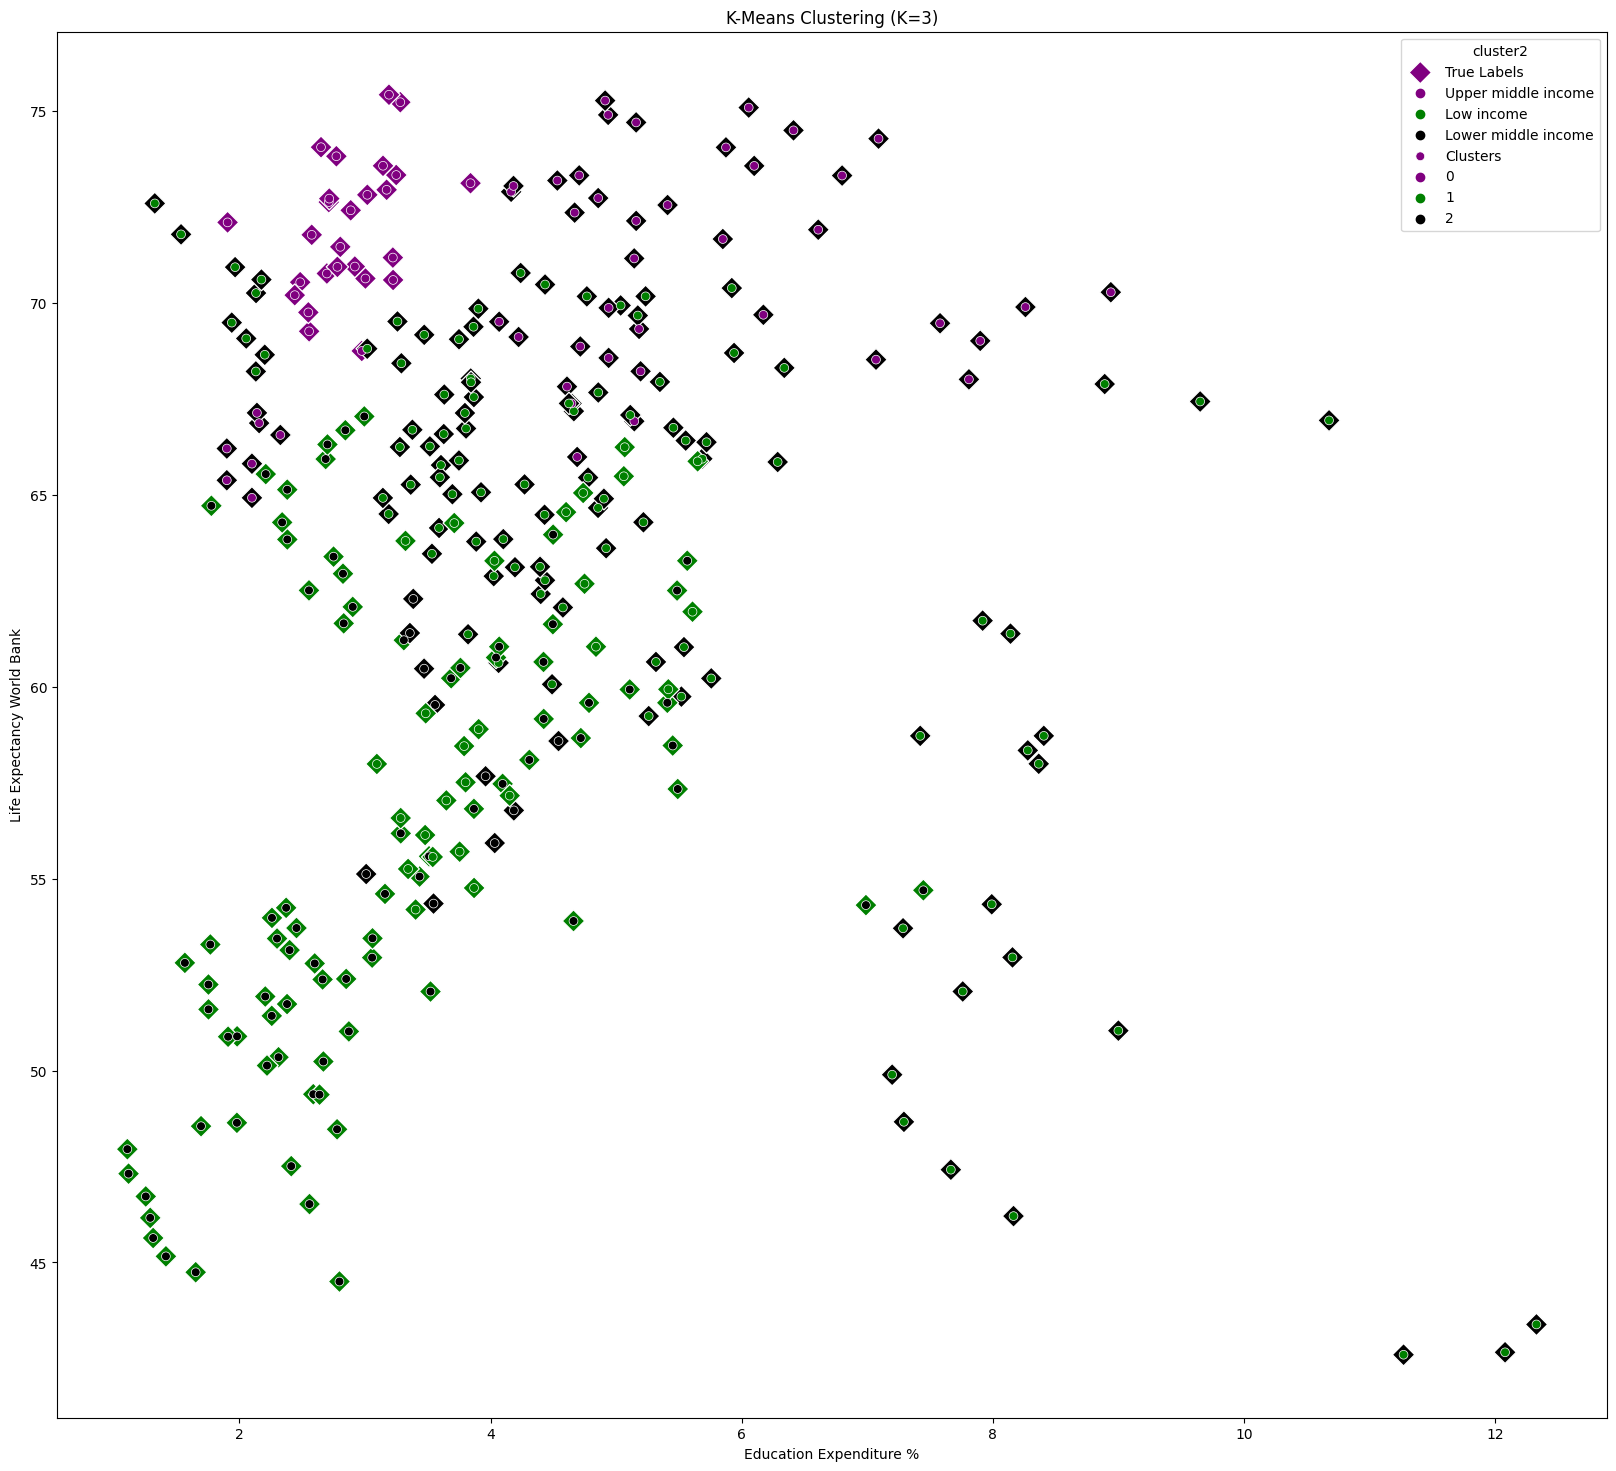

In [31]:
# Karena hasil prediksi memiliki urutan berbeda dengan label aslinya
# Maka harus dilakukan mapping seperti berikut

cluster_mapping = {0: 1, 1: 0, 2: 2} # 0 jadi 1; 1 jadi 0; 2 tetap 2

# Buat kolom baru agar tidak mengganggu kolom hasil prediksi
df["cluster2"] = df["cluster"].map(cluster_mapping)

# Buat sebuah scatter plot untuk data-points label aslinya
plt.figure(figsize=(20,18))
warna = ["purple", "green", "black"]
sns.scatterplot(df, x='Education Expenditure %', y='Life Expectancy World Bank', palette=warna,
hue='IncomeGroup', marker="D", s=130, label="True Labels")

# Tindih data-points tersebut dengan hasil prediksinya
sns.scatterplot(df, x='Education Expenditure %', y='Life Expectancy World Bank', palette=warna,
hue="cluster2", marker="o", s=40, label="Clusters")

plt.title("K-Means Clustering (K=3)")
plt.xlabel("Education Expenditure %")
plt.ylabel("Life Expectancy World Bank")
plt.legend(title="Legend", loc="upper right")
plt.show()